In [12]:
import os
import shutil
from itertools import product

import numpy as np
import xarray as xr

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import pop_tools
import xpersist as xp
from scipy import integrate
from sklearn.model_selection import train_test_split

import dask
import util

In [3]:
#import plotting modules
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.colors as colors
from matplotlib.colorbar import Colorbar 
from matplotlib import ticker, cm
import cartopy
import cartopy.crs as ccrs
from cartopy.util import add_cyclic_point
import cmocean
from matplotlib.ticker import FormatStrFormatter


### Reviewer 2 on Omega

They think that one piece that's missing is the start of climate change. So I would suggest if you make that map, do it, you know, just quickly you and assess how interesting it is. And, and decide on that basis whether it needs to be included as a image 

or 

just say, there's some summary statistics like, you know, the mean start of climate change over the domain is 19XX +- X
Can also add that figure six doesn't show a trend, it shows time of emergence.

In [4]:
ds_toe = xr.open_zarr('data/cesm-le-fields-djf-Henson-ToE-maps.zarr')
#ds_toe = xr.open_zarr('data/cesm-le-fields-djf-ToE-maps.zarr')
ds_toe = ds_toe.drop('nlat')
ds_toe = ds_toe.drop('nlon')
#ds_toe

In [5]:
# Polar Plottable
dsp_kgp = util.pop_add_cyclic(
    xr.Dataset({
        'ToE': ds_toe.KGP_toe,
        'inflect': ds_toe.KGP_inflect,
        't_time': ds_toe.KGP_toetime,

        'TLAT': ds_toe.TLAT.compute(),
        'TLONG': ds_toe.TLONG.compute() } ))
#dsp_kgp
dsp_sst = util.pop_add_cyclic(
    xr.Dataset({
        'ToE': ds_toe.SST_toe,
        'inflect': ds_toe.SST_inflect,
        't_time': ds_toe.SST_toetime,

        'TLAT': ds_toe.TLAT.compute(),
        'TLONG': ds_toe.TLONG.compute() } ))
#dsp_sst
dsp_chl = util.pop_add_cyclic(
    xr.Dataset({
        'ToE': ds_toe.Chl_surf_toe,
        'inflect': ds_toe.Chl_surf_inflect,
        't_time': ds_toe.Chl_surf_toetime,

        'TLAT': ds_toe.TLAT.compute(),
        'TLONG': ds_toe.TLONG.compute() } ))
#dsp_chl

## Plot!

In [6]:
extent = ([-180, 180, -90, -50], ccrs.PlateCarree())
prj = ccrs.SouthPolarStereo()

levels_toe = np.arange(1920, 2110, 10)
cmap_toe = cmocean.cm.deep_r
cmap_toe = cmocean.tools.crop_by_percent(cmap_toe, 15, which='min', N=None)

def toe_plot(da):
    prj = ccrs.SouthPolarStereo()
    # filled contours
    cf = ax.contourf(dsp.TLONG, dsp.TLAT, da,
                     levels = levels_toe,
                     cmap = cmap_toe,
                     #norm= norm_toe,
                     extend = 'max',
                     transform=ccrs.PlateCarree())
    # land
    land = ax.add_feature(
        cartopy.feature.NaturalEarthFeature('physical', 'land', '110m',
                                            facecolor='lightgray'))
    
    ax.coastlines(linewidth=0.5)
    ax.gridlines(linewidth=.25, color='black', alpha=1, linestyle='--').n_steps = 90 # this makes them rounder
    return cf

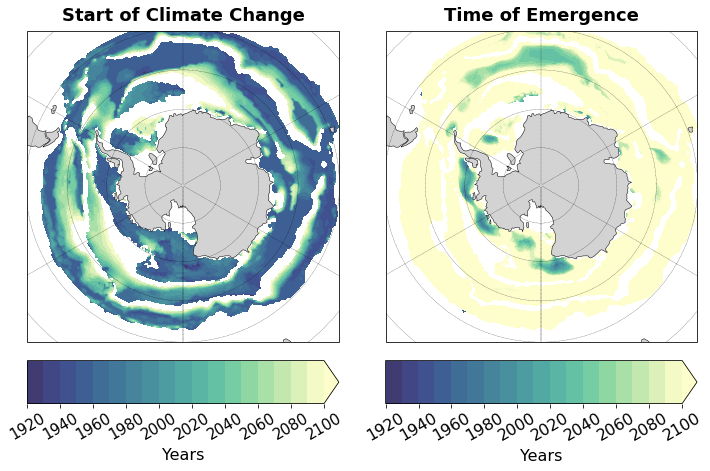

In [7]:
################### FIGURE SET-UP ##########################
fig = plt.figure(figsize=(12, 12))
gs = gridspec.GridSpec(2,2, height_ratios=[2,0.25], top=0.9, bottom=0.45, right=0.9, wspace = 0.15, hspace = 0.01)
t1, t2 = 'Start of Climate Change', 'Time of Emergence'
dsp = dsp_kgp
plt_ttl = 'KGP: toe extra'
unit = 'Years'

################### LEFT MOST PLOT: Current Mean ############################
ax = fig.add_subplot(gs[0, 0], projection=prj)
ax.set_extent([-180, 180, -90, -50], ccrs.PlateCarree())
ax.set_title(f'{t1}', fontsize = 18, fontweight = 'bold',pad=10)

cf = toe_plot(dsp.inflect)

#  COLORBAR FOR Current Mean PLOT
cbax = plt.subplot(gs[1,0]) # Place it where it should be.
cb = Colorbar(ax = cbax, mappable = cf, orientation = 'horizontal')#, ticklocation = 'top')
cb.set_label(f'{unit}',  labelpad=5, fontsize = 16)
cb.ax.xaxis.set_label_position('bottom')
cb.ax.tick_params(labelsize=15,rotation = 30)

################### 2nd Left PLOT: Standard Deviation ############################
ax = fig.add_subplot(gs[0, 1], projection=prj)
ax.set_extent([-180, 180, -90, -50], ccrs.PlateCarree())
ax.set_title(f'{t2}', fontsize = 18, fontweight = 'bold',pad=10)

cf = toe_plot(dsp.ToE)

#  COLORBAR FOR Standard Deviation PLOT
cbax = plt.subplot(gs[1,1]) # Place it where it should be.
cb = Colorbar(ax = cbax, mappable = cf, orientation = 'horizontal')#, ticklocation = 'top')
cb.set_label(f'{unit}',  labelpad=5, fontsize = 16)
cb.ax.xaxis.set_label_position('bottom')
cb.ax.tick_params(labelsize=16,rotation = 30)

# #--------------------------------------------------------
# title = (f'{plt_ttl}')
# path = 'figures/'
# file = '.pdf'
# plt.savefig(path + title + file, bbox_inches='tight')

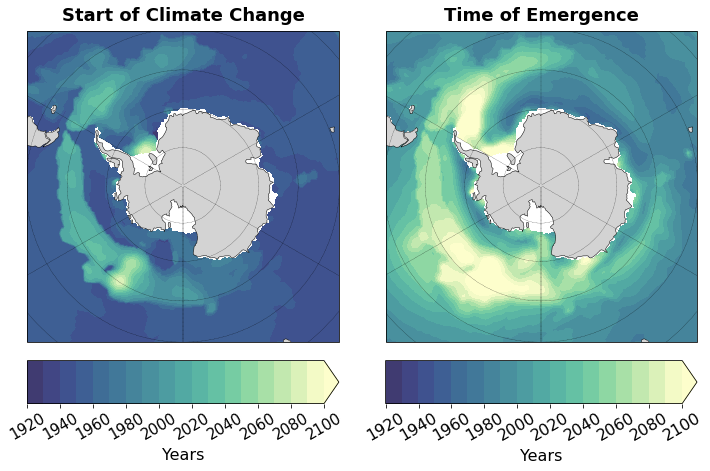

In [8]:
################### FIGURE SET-UP ##########################
fig = plt.figure(figsize=(12, 12))
gs = gridspec.GridSpec(2,2, height_ratios=[2,0.25], top=0.9, bottom=0.45, right=0.9, wspace = 0.15, hspace = 0.01)
t1, t2 = 'Start of Climate Change', 'Time of Emergence'
dsp = dsp_sst
plt_ttl = 'SST: toe extra'
unit = 'Years'

################### LEFT MOST PLOT: Current Mean ############################
ax = fig.add_subplot(gs[0, 0], projection=prj)
ax.set_extent([-180, 180, -90, -50], ccrs.PlateCarree())
ax.set_title(f'{t1}', fontsize = 18, fontweight = 'bold',pad=10)

cf = toe_plot(dsp.inflect)

#  COLORBAR FOR Current Mean PLOT
cbax = plt.subplot(gs[1,0]) # Place it where it should be.
cb = Colorbar(ax = cbax, mappable = cf, orientation = 'horizontal')#, ticklocation = 'top')
cb.set_label(f'{unit}',  labelpad=5, fontsize = 16)
cb.ax.xaxis.set_label_position('bottom')
cb.ax.tick_params(labelsize=15,rotation = 30)

################### 2nd Left PLOT: Standard Deviation ############################
ax = fig.add_subplot(gs[0, 1], projection=prj)
ax.set_extent([-180, 180, -90, -50], ccrs.PlateCarree())
ax.set_title(f'{t2}', fontsize = 18, fontweight = 'bold',pad=10)

cf = toe_plot(dsp.ToE)

#  COLORBAR FOR Standard Deviation PLOT
cbax = plt.subplot(gs[1,1]) # Place it where it should be.
cb = Colorbar(ax = cbax, mappable = cf, orientation = 'horizontal')#, ticklocation = 'top')
cb.set_label(f'{unit}',  labelpad=5, fontsize = 16)
cb.ax.xaxis.set_label_position('bottom')
cb.ax.tick_params(labelsize=16,rotation = 30)

# #--------------------------------------------------------
# title = (f'{plt_ttl}')
# path = 'figures/'
# file = '.pdf'
# plt.savefig(path + title + file, bbox_inches='tight')

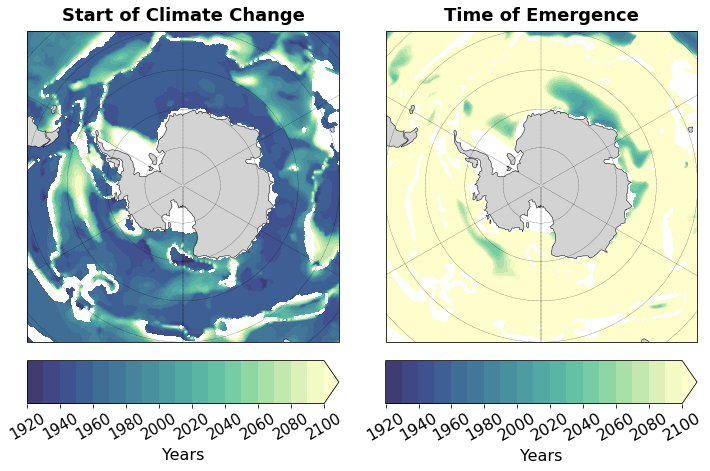

In [9]:
################### FIGURE SET-UP ##########################
fig = plt.figure(figsize=(12, 12))
gs = gridspec.GridSpec(2,2, height_ratios=[2,0.25], top=0.9, bottom=0.45, right=0.9, wspace = 0.15, hspace = 0.01)
t1, t2 = 'Start of Climate Change', 'Time of Emergence'
dsp = dsp_chl
plt_ttl = 'Chl: toe extra'
unit = 'Years'

################### LEFT MOST PLOT: Current Mean ############################
ax = fig.add_subplot(gs[0, 0], projection=prj)
ax.set_extent([-180, 180, -90, -50], ccrs.PlateCarree())
ax.set_title(f'{t1}', fontsize = 18, fontweight = 'bold',pad=10)

cf = toe_plot(dsp.inflect)

#  COLORBAR FOR Current Mean PLOT
cbax = plt.subplot(gs[1,0]) # Place it where it should be.
cb = Colorbar(ax = cbax, mappable = cf, orientation = 'horizontal')#, ticklocation = 'top')
cb.set_label(f'{unit}',  labelpad=5, fontsize = 16)
cb.ax.xaxis.set_label_position('bottom')
cb.ax.tick_params(labelsize=15,rotation = 30)

################### 2nd Left PLOT: Standard Deviation ############################
ax = fig.add_subplot(gs[0, 1], projection=prj)
ax.set_extent([-180, 180, -90, -50], ccrs.PlateCarree())
ax.set_title(f'{t2}', fontsize = 18, fontweight = 'bold',pad=10)

cf = toe_plot(dsp.ToE)

#  COLORBAR FOR Standard Deviation PLOT
cbax = plt.subplot(gs[1,1]) # Place it where it should be.
cb = Colorbar(ax = cbax, mappable = cf, orientation = 'horizontal')#, ticklocation = 'top')
cb.set_label(f'{unit}',  labelpad=5, fontsize = 16)
cb.ax.xaxis.set_label_position('bottom')
cb.ax.tick_params(labelsize=16,rotation = 30)

# #--------------------------------------------------------
# title = (f'{plt_ttl}')
# path = 'figures/'
# file = '.pdf'
# plt.savefig(path + title + file, bbox_inches='tight')

___

## Time series
#### Objective: plot the cumulative integral of positive krill growth

These are the steps to create the dataset 'cesm-le-fields-djf-Henson-ToE-ts.zarr' - skip below the function to load in the already calculated data

In [10]:
# load transformed data
ds_djf_regional = xr.open_zarr('data/cesm-le-regional-timeseries.zarr') #-drift-corrected.zarr')
ds_djf = ds_djf_regional[['SST', 'Chl_surf', 'KGP']].sel(length=40)

#### Compute the properties of the unperturbed climate

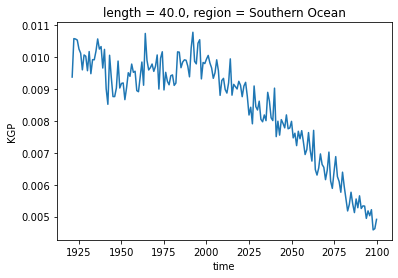

In [57]:
#the Mean
ds_ref_mean = (
        ds_djf.sel(time=slice(1920, 1950))
        .mean(dim=['time', 'member_id'])
        .compute()
)
# Standard deviation of anomalies
ds_ref_std = (
        (ds_djf - ds_djf.mean(dim=['member_id']).sel(time=slice(1920, 1950)))
        .std(dim=['time', 'member_id'])
        .compute()
)
# the anomalies relative to the reference
forced = ds_djf.mean('member_id')     
anom_f = forced - ds_ref_mean

forced.KGP.sel(region='Southern Ocean').plot()

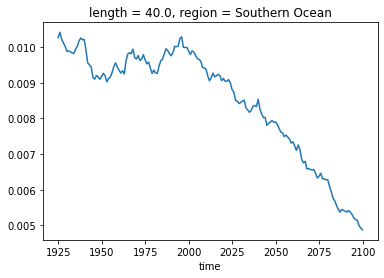

In [75]:
# Rolling Mean Test
da = forced.KGP.sel(region='Southern Ocean')

roller = da.rolling(time=5)
roller.mean().plot()


### Calculate Cumulative Integral 

In [62]:
# Calculate cumulative integral
time = anom_f.time.values
cumtrapz = integrate.cumtrapz(anom_f.KGP.sel(region='Southern Ocean').values, time, initial=0)

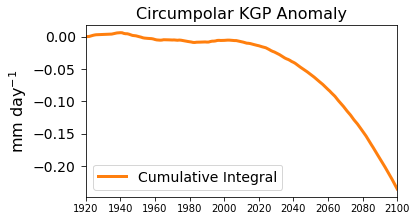

In [63]:
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(gs[0, 0])
ax.set_xlim((1920, 2100))
#limYMin, limYMax = -0.01, 0.01

#~~~~~~~~~~~~~~ Plot Best Fit of Climate Change~~~~~~
ax.plot(time, cumtrapz, color = 'C1', linewidth = 3, label = 'Cumulative Integral') # full time series

ax.set_ylabel('mm day$^{-1}$', fontsize = 16)
ax.tick_params(axis='y', which='major', length=5, pad=5, labelsize=14)
title = 'Circumpolar KGP Anomaly'
ax.set_title(title, fontsize = 16);
ax.legend(ncol = 3, fontsize = 14)
#--------------------------------------------------------
title = ('CI_KGP')
path = 'figures/'
file = '.png'
plt.savefig(path + title + file, bbox_inches='tight')

___

## Decline in Area

make at a PDF of this KGP, this field, right, or this is kind of mean growth. And this is Sarah, and then if you do the same sort of thing, have the end of the century, so this is the integral under that curve. There is the integral of that curve with respect to x, that is area. Right, so this is the sort of distribution of area by krill growth potential. Does that make sense,

In [76]:
ds_djf = xr.open_zarr(f'{util.project_tmpdir}/cesm-le-fields-djf.zarr')
ds_djf = ds_djf[['SST', 'Chl_surf', 'KGP']].sel(length = 40)
ds_djf

<xarray.Dataset>
Dimensions:    (member_id: 34, nlat: 93, nlon: 320, time: 180)
Coordinates:
    ULONG      (nlat, nlon) float64 dask.array<chunksize=(93, 320), meta=np.ndarray>
  * member_id  (member_id) int64 1 2 9 10 11 12 13 ... 34 35 101 102 103 104 105
    ULAT       (nlat, nlon) float64 dask.array<chunksize=(93, 320), meta=np.ndarray>
    TAREA      (nlat, nlon) float64 dask.array<chunksize=(93, 320), meta=np.ndarray>
    KMT        (nlat, nlon) float64 dask.array<chunksize=(93, 320), meta=np.ndarray>
    length     float64 40.0
    TLAT       (nlat, nlon) float64 dask.array<chunksize=(93, 320), meta=np.ndarray>
  * time       (time) int64 1921 1922 1923 1924 1925 ... 2097 2098 2099 2100
    TLONG      (nlat, nlon) float64 dask.array<chunksize=(93, 320), meta=np.ndarray>
Dimensions without coordinates: nlat, nlon
Data variables:
    SST        (time, member_id, nlat, nlon) float64 dask.array<chunksize=(180, 1, 93, 320), meta=np.ndarray>
    Chl_surf   (time, member_id, nlat, nlon) float64 dask.array<chunksize=(180, 1, 93, 320), meta=np.ndarray>
    KGP        (time, member_id, nlat, nlon) float64 dask.array<chunksize=(180, 1, 93, 320), meta=np.ndarray>